In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
pd_train_dataset = pd.read_csv('ja_back_translation-2.csv')
pd_train_dataset

,id,sentence,subject_entity,object_entity,label,source
0,2030,서울에서 태어나 어린 시절 가족과 함께 미국으로 이민 온 존 조는 본명이 조요한으로...,"{'word': '존 조', 'start_idx': 32, 'end_idx': 34...","{'word': '조요한', 'start_idx': 41, 'end_idx': 43...",per:alternate_names,wikitree
1,12180,특히 문재인 대통령이 개회식에 참석한 데 이어 김정숙 여사가 대회 중반 1박 2일 ...,"{'word': '김정숙', 'start_idx': 26, 'end_idx': 28...","{'word': '문재인', 'start_idx': 3, 'end_idx': 5, ...",per:spouse,wikitree
2,6090,"호찌민시의 인터넷 서비스 제공자로는 베트남 데이터 커뮤니케이션 컴퍼니(VDC), C...","{'word': '베트남', 'start_idx': 20, 'end_idx': 22...","{'word': '호찌민', 'start_idx': 0, 'end_idx': 2, ...",org:members,wikipedia
3,18267,"인천시설공단(이사장 김영분) 강화경기장은 ""시설이용 활성화를 위해 인천광역시와 공동...","{'word': '인천시설공단', 'start_idx': 0, 'end_idx': ...","{'word': '인천광역시', 'start_idx': 37, 'end_idx': ...",org:member_of,wikitree
4,26383,요한 19세가 사망한 후 교황 베네딕토 9세의 후계자가 되었다.,"{'word': '요한 19세', 'start_idx': 0, 'end_idx': ...","{'word': '베네딕토 9세', 'start_idx': 17, 'end_idx'...",per:other_family,wikipedia
...,...,...,...,...,...,...
13692,12176,배우 송윤아와 결혼한 뒤 같은 소속사에 몸담았던 설경구는 2013년 8월 씨제스엔터...,"{'word': '송윤아', 'start_idx': 3, 'end_idx': 5, ...","{'word': '설경구', 'start_idx': 27, 'end_idx': 29...",per:spouse,wikipedia
13693,6075,박근혜 대통령은 조선일보가 주최하는 제5회 아시아 콘퍼런스에 2014년 3월 3일 ...,"{'word': '조선일보', 'start_idx': 9, 'end_idx': 12...","{'word': '방상훈', 'start_idx': 52, 'end_idx': 54...",org:top_members/employees,wikipedia
13694,2021,로마 신화에서 넵투누스는 바다의 신으로 그리스 신화의 포세이돈에 대응하는 신이다.,"{'word': '넵투누스', 'start_idx': 8, 'end_idx': 11...","{'word': '포세이돈', 'start_idx': 30, 'end_idx': 3...",no_relation,wikipedia
13695,22300,"원창왕후(元昌王后, 생몰년 미상)는 고려의 추존왕후로 추존왕인 의조(작제건)의 처이...","{'word': '작제건', 'start_idx': 38, 'end_idx': 40...","{'word': '원창왕후', 'start_idx': 0, 'end_idx': 3,...",per:spouse,wikipedia


In [11]:
print(pd_train_dataset['sentence'][0])
print(pd_train_dataset['subject_entity'][0])
print(pd_train_dataset['object_entity'][0])

서울에서 태어나 어린 시절 가족과 함께 미국으로 이민 온 존 조는 본명이 조요한으로 아메리칸 파이 해럴드와 곰 스타트렉 등에 출연했으며 인디밴드에서 보컬로도 활동하고 있다.
{'word': '존 조', 'start_idx': 32, 'end_idx': 34, 'type': 'PER'}
{'word': '조요한', 'start_idx': 41, 'end_idx': 43, 'type': 'PER'}


In [12]:
pd_train_dataset['label'].unique()

array(['per:alternate_names', 'per:spouse', 'org:members',
       'org:member_of', 'per:other_family', 'per:date_of_birth',
       'no_relation', 'org:top_members/employees', 'per:origin',
       'per:title', 'per:colleagues', 'org:founded', 'per:employee_of',
       'per:schools_attended', 'per:children', 'org:alternate_names',
       'org:place_of_headquarters', 'per:religion', 'org:product',
       'per:parents', 'per:place_of_residence', 'org:founded_by',
       'per:date_of_death', 'org:dissolved', 'per:product',
       'per:siblings', 'per:place_of_birth',
       'org:political/religious_affiliation', 'per:place_of_death',
       'org:number_of_employees/members'], dtype=object)

In [13]:
pd_train_dataset['source'].unique()

array(['wikitree', 'wikipedia', 'policy_briefing'], dtype=object)

no_relation                            4258
org:top_members/employees              2063
per:employee_of                        1241
per:title                               842
org:member_of                           779
per:date_of_birth                       553
org:alternate_names                     524
org:place_of_headquarters               523
per:origin                              470
per:spouse                              306
per:alternate_names                     302
per:colleagues                          239
org:founded                             239
org:members                             201
org:product                             192
per:parents                             165
per:date_of_death                       156
per:children                             94
per:place_of_residence                   84
per:other_family                         73
org:political/religious_affiliation      62
per:place_of_birth                       56
org:founded_by                  

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

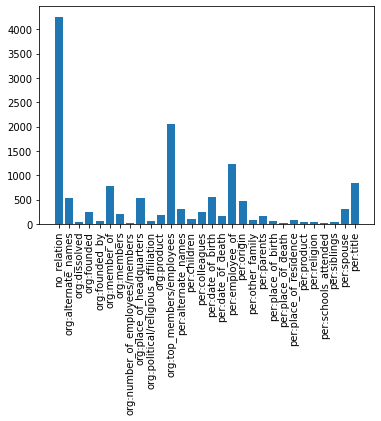

In [14]:
print(pd_train_dataset['label'].value_counts())
labels = pd.value_counts(pd_train_dataset['label']).sort_index()
plt.bar(labels.index, labels)
plt.xticks(rotation=90)

[(79, 413), (69, 395), (62, 391), (74, 377), (78, 373), (67, 369), (76, 368), (64, 367), (68, 367), (77, 367)]


<BarContainer object of 361 artists>

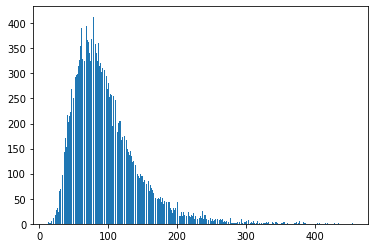

In [10]:
from collections import Counter

counter = list(pd_train_dataset['sentence'].values)
lengths = []
for c in counter:
    lengths.append(len(c))
c = Counter(lengths)
# key: length, value: frequency
print(c.most_common(10))
plt.bar(c.keys(), c.values())
plt.xticks(rotation=45)

In [11]:
s = 0
for k, v in c.items():
    if k > 256:
        s += v
print(s)
print(sum(c.values()))

381
32470


In [25]:
pd_train_dataset.duplicated(['sentence', 'subject_entity', 'object_entity']).sum()

47

In [26]:
len(pd_train_dataset['sentence'].unique())

28803

In [32]:
pd.set_option('display.max_row', 100)

In [34]:
check_dup = pd_train_dataset[pd_train_dataset.duplicated(['sentence', 'subject_entity', 'object_entity'], keep=False)]

In [36]:
check_dup.sort_values(by='sentence')

,id,sentence,subject_entity,object_entity,label,source
9618,9618,"1959-60 시즌 이후의 알파 에트니키 / 수페르리가 엘라다, 그리스 컵, 그리고...","{'word': '수페르리가 엘라다', 'start_idx': 25, 'end_id...","{'word': '그리스', 'start_idx': 36, 'end_idx': 38...",no_relation,wikipedia
22090,22090,"1959-60 시즌 이후의 알파 에트니키 / 수페르리가 엘라다, 그리스 컵, 그리고...","{'word': '수페르리가 엘라다', 'start_idx': 25, 'end_id...","{'word': '그리스', 'start_idx': 36, 'end_idx': 38...",no_relation,wikipedia
25368,25368,2001년 4월 민주국민당 김윤환 의원과 민주당 의원 사이의 정책 연합과 관련한 통...,"{'word': '민주국민당', 'start_idx': 9, 'end_idx': 1...","{'word': '민주당', 'start_idx': 23, 'end_idx': 25...",no_relation,wikipedia
2500,2500,2001년 4월 민주국민당 김윤환 의원과 민주당 의원 사이의 정책 연합과 관련한 통...,"{'word': '민주국민당', 'start_idx': 9, 'end_idx': 1...","{'word': '민주당', 'start_idx': 23, 'end_idx': 25...",no_relation,wikipedia
255,255,2010년 10월 15일 전라북도청을 방문한 맹형규 행정안전부 장관은 도내 지자체간...,"{'word': '전라북도청', 'start_idx': 14, 'end_idx': ...","{'word': '행정안전부', 'start_idx': 29, 'end_idx': ...",no_relation,wikipedia
3547,3547,2010년 10월 15일 전라북도청을 방문한 맹형규 행정안전부 장관은 도내 지자체간...,"{'word': '전라북도청', 'start_idx': 14, 'end_idx': ...","{'word': '행정안전부', 'start_idx': 29, 'end_idx': ...",no_relation,wikipedia
13993,13993,4.15 총선 후보로 공천됐다가 최소된 미래통합당 김원성 최고위원이 유서를 남기고 ...,"{'word': '김원성', 'start_idx': 28, 'end_idx': 30...","{'word': '미래통합당', 'start_idx': 22, 'end_idx': ...",per:employee_of,wikitree
31510,31510,4.15 총선 후보로 공천됐다가 최소된 미래통합당 김원성 최고위원이 유서를 남기고 ...,"{'word': '김원성', 'start_idx': 28, 'end_idx': 30...","{'word': '미래통합당', 'start_idx': 22, 'end_idx': ...",per:employee_of,wikitree
27116,27116,"‘문재인 영입 인사’로 발탁돼 제20대 총선에 광주 서구을에 출마했고, 더불어민주당...","{'word': '더불어민주당', 'start_idx': 40, 'end_idx':...","{'word': '문재인', 'start_idx': 1, 'end_idx': 3, ...",no_relation,wikitree
16145,16145,"‘문재인 영입 인사’로 발탁돼 제20대 총선에 광주 서구을에 출마했고, 더불어민주당...","{'word': '더불어민주당', 'start_idx': 40, 'end_idx':...","{'word': '문재인', 'start_idx': 1, 'end_idx': 3, ...",no_relation,wikitree


In [41]:
check_dup[check_dup.duplicated(['sentence', 'subject_entity', 'object_entity', 'label'], keep=False) != True].sort_values(by='sentence')

,id,sentence,subject_entity,object_entity,label,source
6749,6749,대한항공은 5일 조양호 회장의 3자녀가 보유한 싸이버스카이 주식 9만9900주 전량...,"{'word': '대한항공', 'start_idx': 0, 'end_idx': 3,...","{'word': '조양호', 'start_idx': 9, 'end_idx': 11,...",no_relation,wikipedia
12829,12829,대한항공은 5일 조양호 회장의 3자녀가 보유한 싸이버스카이 주식 9만9900주 전량...,"{'word': '대한항공', 'start_idx': 0, 'end_idx': 3,...","{'word': '조양호', 'start_idx': 9, 'end_idx': 11,...",org:top_members/employees,wikipedia
8364,8364,배우 김병철 씨가 연기하는 정복동은 천리마마트를 망하게 하기 위해 여러 계획을 세우...,"{'word': '정복동', 'start_idx': 15, 'end_idx': 17...","{'word': '김병철', 'start_idx': 3, 'end_idx': 5, ...",no_relation,wikitree
32299,32299,배우 김병철 씨가 연기하는 정복동은 천리마마트를 망하게 하기 위해 여러 계획을 세우...,"{'word': '정복동', 'start_idx': 15, 'end_idx': 17...","{'word': '김병철', 'start_idx': 3, 'end_idx': 5, ...",per:alternate_names,wikitree
11511,11511,"영화 '버즈 오브 프레이'는 배트맨이 없는 고담시에서 할리퀸, 헌트리스, 블랙 카나...","{'word': '배트맨', 'start_idx': 16, 'end_idx': 18...","{'word': '고담시', 'start_idx': 24, 'end_idx': 26...",per:place_of_residence,wikitree
22258,22258,"영화 '버즈 오브 프레이'는 배트맨이 없는 고담시에서 할리퀸, 헌트리스, 블랙 카나...","{'word': '배트맨', 'start_idx': 16, 'end_idx': 18...","{'word': '고담시', 'start_idx': 24, 'end_idx': 26...",no_relation,wikitree
3296,3296,"이날 프로그램 공개에서는 전북영산작법보존회와 김명신‧정상희의 사제동행 판소리, 관악...","{'word': '강태환', 'start_idx': 62, 'end_idx': 64...","{'word': '색소폰', 'start_idx': 58, 'end_idx': 60...",per:title,wikitree
4212,4212,한편 전라남도는 최근 확진자가 발생한 순천시와 여수시에 마스크를 각각 2만장씩 총 ...,"{'word': '전라남도', 'start_idx': 3, 'end_idx': 6,...","{'word': '여수시', 'start_idx': 26, 'end_idx': 28...",org:members,wikitree
25094,25094,한편 전라남도는 최근 확진자가 발생한 순천시와 여수시에 마스크를 각각 2만장씩 총 ...,"{'word': '전라남도', 'start_idx': 3, 'end_idx': 6,...","{'word': '여수시', 'start_idx': 26, 'end_idx': 28...",org:place_of_headquarters,wikitree


In [23]:
from transformers import AutoTokenizer

def preprocessing_dataset(dataset):
    """ 처음 불러온 csv 파일을 원하는 형태의 DataFrame으로 변경 시켜줍니다."""
    subject_entity = []
    object_entity = []
    for i,j in zip(dataset['subject_entity'], dataset['object_entity']):
        i = i[1:-1].split(',')[0].split(':')[1]
        j = j[1:-1].split(',')[0].split(':')[1]

        subject_entity.append(i)
        object_entity.append(j)
    out_dataset = pd.DataFrame({'id':dataset['id'], 'sentence':dataset['sentence'],'subject_entity':subject_entity,'object_entity':object_entity,'label':dataset['label'],})
    return out_dataset

preprocessed_train_dataset = preprocessing_dataset(pd_train_dataset)

MODEL_NAME = "klue/bert-base"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

concat_entity = []
for e1, e2 in zip(preprocessed_train_dataset['subject_entity'], preprocessed_train_dataset['object_entity']):
    t = e1 + '[SEP]' + e2
    concat_entity.append(t)
    
tokenized_sentences = tokenizer(
      concat_entity,
      list(preprocessed_train_dataset['sentence']),
      return_tensors="pt",
      padding=True,
      truncation=True,
      max_length=256,
      add_special_tokens=True,
      )

print(tokenized_sentences)

{'input_ids': tensor([[    2,    11, 29830,  ...,     0,     0,     0],
        [    2,    11,  3772,  ...,     0,     0,     0],
        [    2,    11,  4104,  ...,     0,     0,     0],
        ...,
        [    2,    11, 18272,  ...,     0,     0,     0],
        [    2,    11, 15710,  ...,     0,     0,     0],
        [    2,    11, 15437,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}


In [24]:
len(tokenized_sentences['input_ids'])

32470

In [27]:
tokenizer.decode(tokenized_sentences['input_ids'][7])

"[CLS]'박용오'[SEP]'1937년 4월 29일'[SEP] 박용오 ( 朴 [UNK] [UNK], 1937년 4월 29일 ( 음력 3월 19일 ) ( 음력 3월 19일 ) ~ 2009년 11월 4일 ) 는 서울에서 태어난 대한민국의 기업인으로 두산그룹 회장, KBO 총재 등을 역임했다. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PA

In [ ]:
# Label order
label_list = ['no_relation', 'org:top_members/employees', 'org:members',
       'org:product', 'per:title', 'org:alternate_names',
       'per:employee_of', 'org:place_of_headquarters', 'per:product',
       'org:number_of_employees/members', 'per:children',
       'per:place_of_residence', 'per:alternate_names',
       'per:other_family', 'per:colleagues', 'per:origin', 'per:siblings',
       'per:spouse', 'org:founded', 'org:political/religious_affiliation',
       'org:member_of', 'per:parents', 'org:dissolved',
       'per:schools_attended', 'per:date_of_death', 'per:date_of_birth',
       'per:place_of_birth', 'per:place_of_death', 'org:founded_by',
       'per:religion']

25976 6494
no_relation                            7627
org:top_members/employees              3427
per:employee_of                        2859
per:title                              1683
org:member_of                          1493
org:alternate_names                    1056
per:origin                              987
org:place_of_headquarters               956
per:date_of_birth                       904
per:alternate_names                     801
per:spouse                              636
per:colleagues                          427
per:parents                             416
org:founded                             360
org:members                             336
per:date_of_death                       334
org:product                             304
per:children                            243
per:place_of_residence                  154
per:other_family                        152
per:place_of_birth                      133
org:founded_by                          124
per:product          

<BarContainer object of 30 artists>

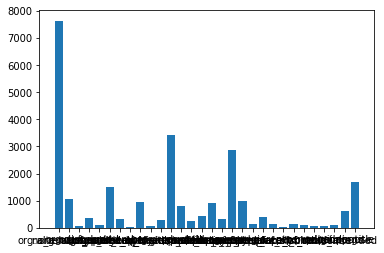

In [60]:
from sklearn.model_selection import train_test_split
import numpy as np
import pickle

def label_to_num(label):
    num_label = []
    with open('baseline/dict_label_to_num.pkl', 'rb') as f:
        dict_label_to_num = pickle.load(f)
    for v in label:
        num_label.append(dict_label_to_num[v])

    return num_label

train_label = label_to_num(pd_train_dataset['label'].values)


train_idx, valid_idx = train_test_split(
    np.arange(len(train_label)), test_size=0.2, random_state=42, shuffle=True, stratify=train_label)

print(len(train_idx), len(valid_idx))
t_split = pd.DataFrame(pd_train_dataset, index=train_idx)
v_split = pd.DataFrame(pd_train_dataset, index=valid_idx)

print(t_split['label'].value_counts())
labels = pd.value_counts(t_split['label']).sort_index()
plt.bar(labels.index, labels)

<BarContainer object of 30 artists>

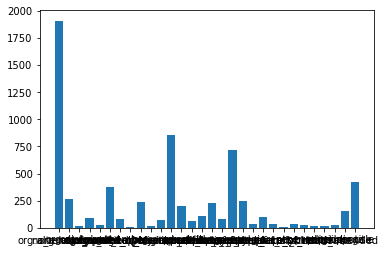

In [61]:
labels = pd.value_counts(v_split['label']).sort_index()
plt.bar(labels.index, labels)

In [ ]:
t_split.to_csv('split_train_20.csv')
v_split.to_csv('split_valid_20.csv')

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import pickle
import pandas as pd

def label_to_num(label):
    num_label = []
    with open('baseline/dict_label_to_num.pkl', 'rb') as f:
        dict_label_to_num = pickle.load(f)
    for v in label:
        num_label.append(dict_label_to_num[v])

    return num_label

pd_train_dataset = pd.read_csv('dataset/train/train.csv')
train_label = label_to_num(pd_train_dataset['label'].values)

train_idx, valid_idx = train_test_split(
    np.arange(len(train_label)), test_size=0.2, random_state=42, shuffle=True, stratify=train_label)

print(len(train_idx), len(valid_idx))
t_split = pd.DataFrame(pd_train_dataset, index=train_idx)
v_split = pd.DataFrame(pd_train_dataset, index=valid_idx)


t_split.to_csv('split_train_20.csv')
v_split.to_csv('split_valid_20.csv')